In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

In [2]:
data = pd.read_csv("./data/Instagram-Reach.csv", encoding = 'latin-1')
data['Date'] = pd.to_datetime(data['Date'])
print(data.head())

        Date  Instagram reach
0 2023-04-01             7620
1 2023-04-02            12859
2 2023-04-03            16008
3 2023-04-04            24349
4 2023-04-05            20532


In [3]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Date'], 
                         y=data['Instagram reach'], 
                         mode='lines', name='Instagram reach'))
fig.update_layout(title='Instagram Reach Trend', xaxis_title='Date', 
                  yaxis_title='Instagram Reach')
fig.show()

In [4]:
fig = go.Figure()
fig.add_trace(go.Bar(x=data['Date'], 
                     y=data['Instagram reach'], 
                     name='Instagram reach'))
fig.update_layout(title='Instagram Reach by Day', 
                  xaxis_title='Date', 
                  yaxis_title='Instagram Reach')
fig.show()

In [5]:
fig = go.Figure()
fig.add_trace(go.Box(y=data['Instagram reach'], 
                     name='Instagram reach'))
fig.update_layout(title='Instagram Reach Box Plot', 
                  yaxis_title='Instagram Reach')
fig.show()

In [6]:
data['Day'] = data['Date'].dt.day_name()
print(data.head())

        Date  Instagram reach        Day
0 2023-04-01             7620   Saturday
1 2023-04-02            12859     Sunday
2 2023-04-03            16008     Monday
3 2023-04-04            24349    Tuesday
4 2023-04-05            20532  Wednesday


In [7]:
day_stats = data.groupby('Day')['Instagram reach'].agg(['mean', 'median', 'std']).reset_index()
print(day_stats)

         Day          mean   median           std
0     Friday  50155.307692  40540.5  29094.493257
1     Monday  52564.596154  47797.0  31263.048649
2   Saturday  48099.320755  44754.0  29088.445967
3     Sunday  46443.377358  39436.0  28042.130345
4   Thursday  49918.372549  42299.0  28612.976054
5    Tuesday  52252.769231  45411.0  32306.474998
6  Wednesday  54001.942308  48786.0  32671.878081


In [8]:
fig = go.Figure()
fig.add_trace(go.Bar(x=day_stats['Day'], 
                     y=day_stats['mean'], 
                     name='Mean'))
fig.add_trace(go.Bar(x=day_stats['Day'], 
                     y=day_stats['median'], 
                     name='Median'))
fig.add_trace(go.Bar(x=day_stats['Day'], 
                     y=day_stats['std'], 
                     name='Standard Deviation'))
fig.update_layout(title='Instagram Reach by Day of the Week', 
                  xaxis_title='Day', 
                  yaxis_title='Instagram Reach')
fig.show()

In [9]:
from plotly.tools import mpl_to_plotly
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
data = data[["Date", "Instagram reach"]]

result = seasonal_decompose(data['Instagram reach'], 
                            model='multiplicative', 
                            period=100)

fig = plt.figure()
fig = result.plot()

fig = mpl_to_plotly(fig)
fig.show()

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

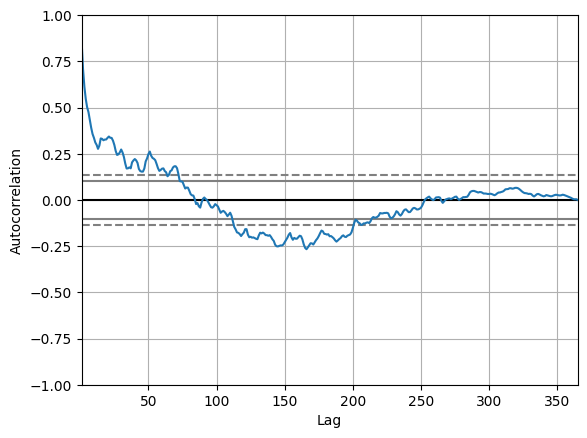

In [11]:
pd.plotting.autocorrelation_plot(data["Instagram reach"])

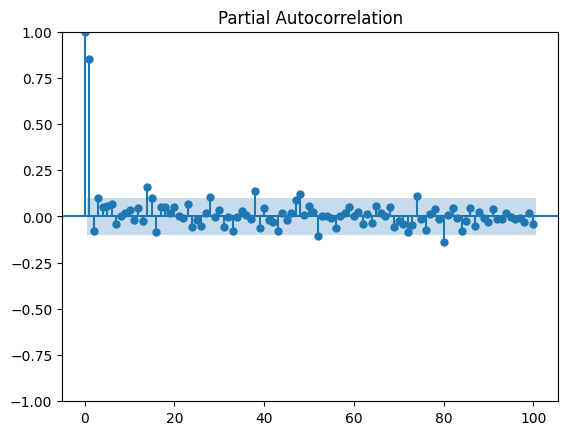

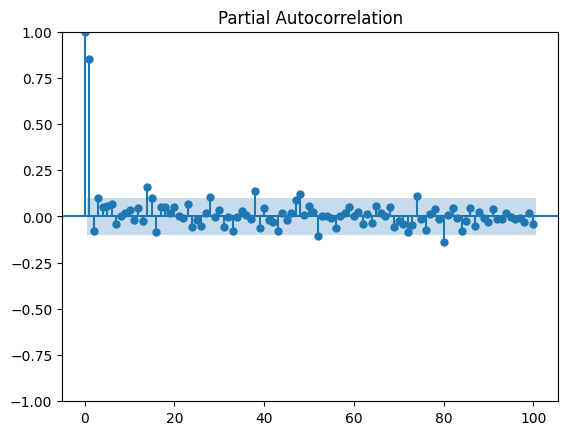

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Instagram reach"], lags = 100)